#### 統計検定2級 学習資料

公式サイトの出題範囲表の用語と関連事項をまとめる。

----

## 1. データの分布


### 1.1. データの分布の記述

ねらい：集められたデータから，基本的な情報を抽出する方法を理解する。

----

#### 項目（学習しておくべき用語）

|番号|項目|alias|
|:---:|:---:|:---:|
|ch1_1-1|質的変数|qualitative variable, (カテゴリカル)|
|ch1_1-2|量的変数|quantitative variable|
|ch1_1-3|幹葉図(みきはず)|stem-and-leaf display|
|ch1_1-4|度数分布表|frequency distribution table|
|ch1_1-5|ヒストグラム|-|
|ch1_1-6|累積相対度数グラフ|cumulative relative frequency graph|


----

#### ch1_1-1 質的変数
#### ch1_1-2 量的変数

統計学のコンテキストでいう変数の意味は、調査される項目のこと。  
データベースのコンテキストでいうと列や属性にあたる。  

質的変数=カテゴリで表す。クラス（まとまり）分けすることが目的。  
量的変数=数量（観測値）で表される。数字の大小に意味があり、連続量や時系列データとして扱う。 


|クラス|学生番号|名前|成績ランク|総合点|
|:---|:---|:---|:---|:---|
|1|X000001|山田太郎|S|498|
|2|X000002|田中次郎|D|150|


上記の例だと、  
  変数: [クラス、学生番号、名前、成績ランク、総合点],  
  量的変数: [総合点],  
  質的変数: [クラス、学生番号、名前、成績ランク]
  
  量的変数のデータを量的データという。例では、総合点の498,150が量的データである。
  
----

#### ch1_1-3 幹葉図

例：10人クラスで英語の点数が、[10,11,21,22,22,23,27,30,36,40]だったとする。

点数の幹葉図は以下のようになる。

```bash
1 | 01      # 10,11             #10の位を左側に書き、1の位を右側に書く
2 | 12237   # 21,22,22,23,27 => # 2{1,2,2,3,7} => 2 | 12237
3 | 06      # 30,36
4 | 0       # 40
```

例では10の位で分けたが、桁数が多い場合の分け方は出題ごとに変わる。
中央値は5番目と6番目の値を2で割れば導出できる。 (22+23)/2 = 22.5

In [4]:
# 幹葉図 中央値導出の確認 python

import math

# print median
data = [10,11,21,22,22,23,27,30,36,40]
data_len = len(data)
data_sorted = sorted(data)
half = math.floor(data_len/2)
median = (data_sorted[half-1]+data_sorted[half])/2

print(median)

22.5


プログラムで導出した中央値と幹葉図から導出した中央値が一致した。

----

#### ch1_1-4 度数分布表
#### ch1_1-5 ヒストグラム

度数分布表=特性値と，その度数または相対度数との関係を観測したもの(日本工業規格)   
ヒストグラム=度数分布表から作成する柱状のグラフ  

...( ・∇・)実際に手を動かす(pandasは別の章でまとめる)

話題の仮想通貨の情報をCoinmarketcapというサイトのAPIで取得し、24時間の価値の変動割合のヒストグラムを作成する。   
サービスが終わったら情報は取得できなくなるので、以下のcmc_uriのページが生きているか確認すること。

In [5]:
# pandasを使ってヒストグラムを作成する
import pandas as pd
import numpy as np

# Coinmarcketcap API
cmc_uri = 'https://api.coinmarketcap.com/v1/ticker/?convert=JPY&limit=0'

# json形式で取得した情報をpandasでdataflameに変換する
df = pd.read_json(cmc_uri)

# 24時間の価格の変動割合の情報がない仮想通貨を削除する
cmc = df.dropna(axis=0,subset=['percent_change_24h'])

# percent_change_24h,nameの変数だけ抽出する
dfext = df.loc[:,['name','percent_change_24h']]

dfext.head(5)

,name,percent_change_24h
0,Bitcoin,16.82
1,Ethereum,15.76
2,Ripple,10.58
3,Bitcoin Cash,13.88
4,Cardano,7.88


In [7]:
# ソートしてみる
dfsort = dfext.sort_values(by=["percent_change_24h"], ascending=False)
dfsort.head(5)

,name,percent_change_24h
1403,LandCoin,305.53
1267,MobileCash,194.13
850,Bitcoin Planet,187.04
716,Aricoin,180.73
167,Paypex,165.35


やっとこさ度数分布表を作るためのデータ抽出が完了したので度数分布表を作成する。

度数分布表の作成手順：
1. 階級の数、階級の間隔を決める  
  sturges' ruleを用いて階級数を決める
2. 分布表における初めの階級の最小値を決める
3. 数えあげて度数を表にする

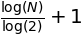

In [8]:
# 1. sturges' rule
%matplotlib inline
from sympy import *
init_printing()

x = Symbol('N')
expr = log(x)/log(2) + 1
expr

上記数式のNはサンプル数を表し、階級数を決める。

In [9]:
# 1, 2.統計量を導出する
dfsort.describe()

,percent_change_24h
count,1479.000000
mean,22.632434
std,24.159308
min,-90.090000
25%,10.570000
50%,20.350000
75%,31.025000
max,305.530000


In [10]:
# 1, countの値をシンボルNに代入して階級数を求める
# HACK: const 1479 -> val
print(expr.subs([(x, 1479)]).evalf())

11.5304063370991


In [88]:
# 階級数=12とする。最小値を-100,最大値を100とする。
# 100%以上の通貨は3つしかないので外れ値として除外して表示させる。
# 3.
frq = dfsort.groupby('percent_change_24h')['name'].count().apply(lambda x: pd.Series([x], index=['percent_change_24h']))
# HACK: const -100,100,12 -> val
c = pd.cut(frq.index, np.arange(-100, 100, 12))
classfied_frequency = frq.groupby(c).sum()

classfied_frequency.head(20)

,percent_change_24h
"(-100, -88]",1.0
"(-88, -76]",1.0
"(-76, -64]",1.0
"(-64, -52]",NaN
"(-52, -40]",6.0
"(-40, -28]",9.0
"(-28, -16]",9.0
"(-16, -4]",38.0
"(-4, 8]",256.0
"(8, 20]",402.0


あまり綺麗な度数分布表にはなっていないが一応完成!  
階級数と間隔をどのようにするかで見え方が変わることに注意する。

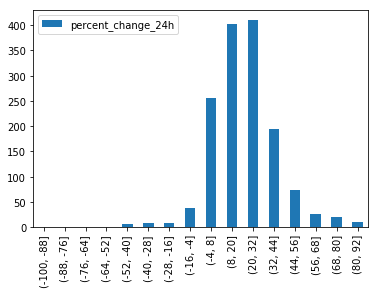

In [89]:
# ヒストグラム作成
import matplotlib.pyplot as plt
import matplotlib as mpl
font = {"family":"DejaVu Sans"}
mpl.rc('font', **font)

classfied_frequency.plot(kind='bar')

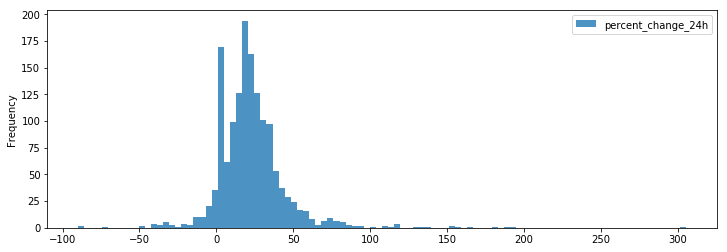

In [90]:
# 別のヒストグラム作成方法 pandasのAPI
dfsort.plot(kind='hist', alpha=0.8, bins=100, figsize=(12,4))

----

#### ch1_1-6 累積相対度数グラフ

ヒストグラムはデータの区間ごとの度数はわかるが、ある区間までで全体の何％が占められているかわからない。  
累積相対度数グラフでは、相対度数を積み上げてある区間で全体の何％が占められているかを視覚化する。

In [91]:
total_count=classfied_frequency.sum()[0]

classfied_frequency['relative_freq'] = classfied_frequency['percent_change_24h']/total_count
classfied_frequency.head(20)

,percent_change_24h,relative_freq
"(-100, -88]",1.0,0.000686
"(-88, -76]",1.0,0.000686
"(-76, -64]",1.0,0.000686
"(-64, -52]",NaN,NaN
"(-52, -40]",6.0,0.004115
"(-40, -28]",9.0,0.006173
"(-28, -16]",9.0,0.006173
"(-16, -4]",38.0,0.026063
"(-4, 8]",256.0,0.175583
"(8, 20]",402.0,0.275720


In [92]:
classfied_frequency['cum_relative_freq'] = classfied_frequency['relative_freq'].cumsum()
classfied_frequency.head(20)

,percent_change_24h,relative_freq,cum_relative_freq
"(-100, -88]",1.0,0.000686,0.000686
"(-88, -76]",1.0,0.000686,0.001372
"(-76, -64]",1.0,0.000686,0.002058
"(-64, -52]",NaN,NaN,NaN
"(-52, -40]",6.0,0.004115,0.006173
"(-40, -28]",9.0,0.006173,0.012346
"(-28, -16]",9.0,0.006173,0.018519
"(-16, -4]",38.0,0.026063,0.044582
"(-4, 8]",256.0,0.175583,0.220165
"(8, 20]",402.0,0.275720,0.495885


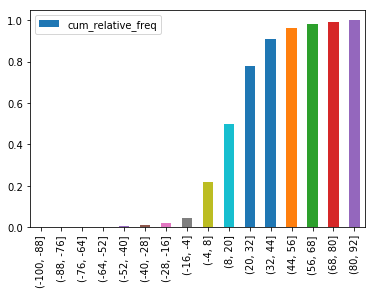

In [96]:
# 累積相対度数グラフ

#classfied_frequency.plot(kind='area',x=['percent_change_24h','relative_freq'])
classfied_frequency.plot.bar(y='cum_relative_freq')

### 参考

参考1: 日本統計学会 編. 改訂版 日本統計学会公式認定 統計検定2級対応 統計学基礎. 東京図書, 2015, 272p  
参考2: 日本統計学会."統計検定2級出題範囲表".http://www.toukei-kentei.jp/wp-content/uploads/grade2_hani_170727.pdf 、(参照2018-02-05).


*Revision:001 2018/02/05 init*